## Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs
from scipy.spatial import Voronoi, voronoi_plot_2d
from matplotlib.patches import Ellipse

## Generate dataset

In [2]:
# generate 2d classification dataset
X, y = make_blobs(n_samples=1000, centers=6, n_features=2, random_state=67)

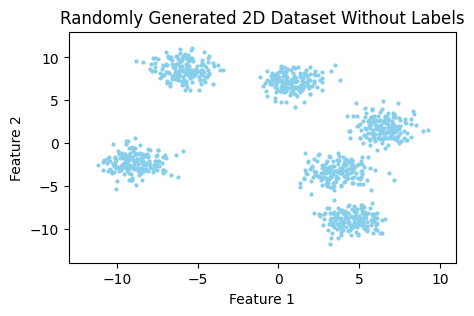

In [3]:
plt.figure(figsize=(5,3)) 
plt.scatter(X[:, 0], X[:, 1], 4,  marker='o', c='skyblue')
plt.title("Randomly Generated 2D Dataset Without Labels")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.xlim([-13, 11])
plt.ylim([-14, 13])
plt.show()

## Exemplu KMeans

In [4]:
kmeans = KMeans(n_clusters=6, random_state=67)
km_labels = kmeans.fit_predict(X)
centers = kmeans.cluster_centers_

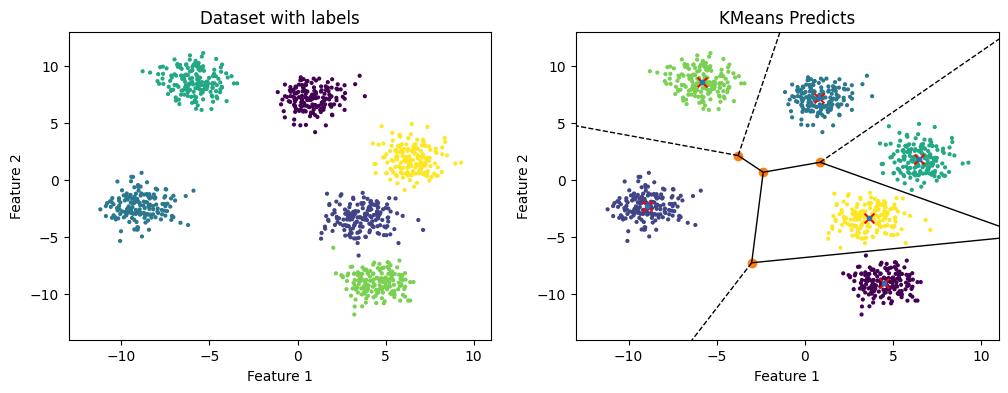

In [5]:
plt.figure(figsize=(12,4)) 
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], 4, c=y)
plt.title("Dataset with labels")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.xlim([-13, 11])
plt.ylim([-14, 13])
vor = Voronoi(centers)
fig = voronoi_plot_2d(vor, plt.subplot(1, 2, 2))
plt.scatter(X[:, 0], X[:, 1], 4, c=km_labels) 
plt.scatter(centers[:, 0], centers[:, 1], marker='x', c='red', s=50)
plt.title("KMeans Predicts")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.xlim([-13, 11])
plt.ylim([-14, 13])
plt.show()

## Exemplu EM(GMM)

In [6]:
gm = GaussianMixture(n_components=6, random_state=67)
gm_labels = gm.fit_predict(X)
centers = gm.means_

In [7]:
color_iter = ["purple", "gold", "olive", "tomato", "powderblue", "orchid"]

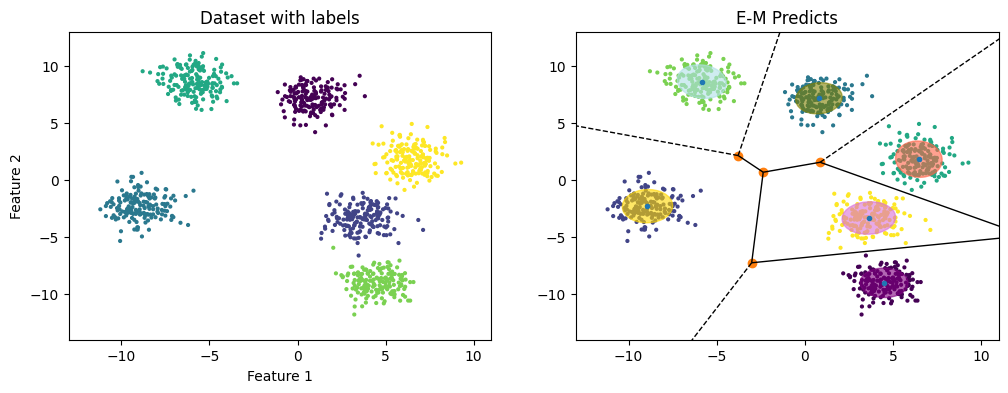

In [8]:
plt.figure(figsize=(12,4)) 
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], 4, marker='o', c=y)
plt.title("Dataset with labels")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.xlim([-13, 11])
plt.ylim([-14, 13])
fig = voronoi_plot_2d(vor, plt.subplot(1, 2, 2))
plt.scatter(X[:, 0], X[:, 1], 4, c=gm_labels)
for i, (mean, covar, color) in enumerate(zip(gm.means_, gm.covariances_, color_iter)): 
    v, w = np.linalg.eigh(covar)
    v = 2.0 * np.sqrt(2.0) * np.sqrt(v)
    u = w[0] / np.linalg.norm(w[0])
    # as the DP will not use every component it has access to
    # unless it needs it, we shouldn't plot the redundant
    # components.
    if not np.any(gm_labels == i):
        continue

    # Plot an ellipse to show the Gaussian component
    angle = np.arctan(u[1] / u[0])
    angle = 180.0 * angle / np.pi  # convert to degrees
    ell = Ellipse(mean, v[0], v[1], angle=180.0 + angle, color=color)
    ell.set_clip_box(plt.subplot(1,2,2).bbox)
    ell.set_alpha(0.6)
    plt.subplot(1,2,2).add_artist(ell)
plt.xlim([-13, 11])
plt.ylim([-14, 13])
plt.title("E-M Predicts")
plt.show()